In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet
from scipy.stats import gamma
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor as GP
from sklearn.gaussian_process import kernels

import my_plotting as mp

%matplotlib inline

In [46]:
def instantiate_and_evaluate_gp(nsamples: int, local_var: np.ndarray, num_of_lines: int, line_index: int) -> np.ndarray:
    xs = []
    lambs = []
    count = 0
    lambs = gamma.rvs(a=5, scale=1, random_state=0, size=nsamples)
    # kernel = (1 / lamb) * kernels.Matern(length_scale=2, nu=1.9)
    kernel = (1 / lambs[0]) * kernels.RBF(length_scale=2)
    gp = GP(kernel=kernel)
    largest_int = 2 ** 32
    while count < nsamples:
        lamb = lambs[count]
        gp.set_params(**{'kernel__k1': kernels.ConstantKernel(constant_value=1/lamb)})
        gp_samples = gp.sample_y(local_var.reshape(-1,1),
                                 random_state=None).flatten()
        xs.append(gp_samples)
        count += 1
        
    return np.array([norm.cdf(x) for x in xs]), np.array(lambs)
    # return np.array([x for x in xs]), np.array(lambs)

In [47]:
local_var = np.linspace(-10, 10, 100)

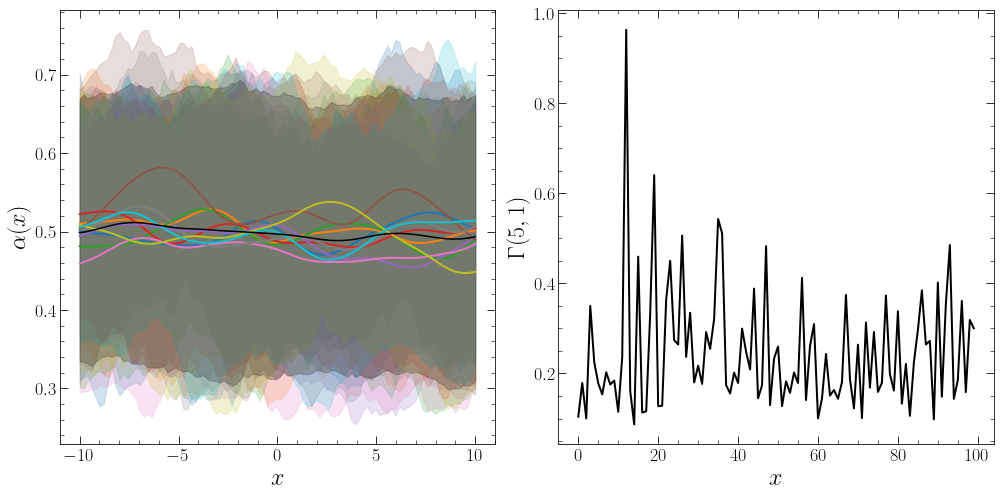

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=(2 * 7, 7))
fig.patch.set_facecolor('white')

num_of_lines = 10
cmap = mp.get_cmap(n=10, name='tab10')
sampled_gps = []
for i in range(num_of_lines):
    samples, lambs = instantiate_and_evaluate_gp(
        nsamples=100,
        local_var=local_var,
        num_of_lines=num_of_lines,
        line_index=i
    )
    mean = np.mean(samples, axis=0)
    credible_interval = np.quantile(
        q=[0.16, 0.84],
        a=samples,
        axis=0
    )
    ax[0].plot(local_var, mean, lw=2, color=cmap(i))
    ax[0].fill_between(local_var, credible_interval[0], credible_interval[1], color=cmap(i), alpha=0.2)
    
    sampled_gps.append(samples)
    
sampled_gps = np.array(sampled_gps).reshape(-1, local_var.size)
ax[0].plot(local_var, np.mean(sampled_gps, axis=0), color='black')
ax[0].fill_between(local_var, *np.quantile(q=[0.16, 0.84], a=sampled_gps, axis=0), color='black', alpha=0.2)
mp.costumize_axis(ax[0], r'$x$', r'$\alpha(x)$')

ax[1].plot(1 / lambs, color='black', lw=2)
mp.costumize_axis(ax[1], r'$x$', r'$\Gamma(5, 1)$')

fig.tight_layout()

In [43]:
local_var = np.linspace(-10, 10, 100)

In [ ]:
samples, lambs = instantiate_and_evaluate_gp(nsamples=100, local_var=local_var)
print(samples.shape)
mean = np.mean(samples, axis=0)
print(mean.shape)
credible_interval = np.quantile(
    q=[0.025, 0.975],
    a=samples,
    axis=0
)
print(credible_interval[0].shape)

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(2 * 7, 7))
fig.patch.set_facecolor('white')

ax[0].plot(local_var, mean, lw=2, color='red')
ax[0].fill_between(local_var, credible_interval[0], credible_interval[1], color='red', alpha=0.2)
mp.costumize_axis(ax[0], r'$x$', r'$\alpha(x)$')

ax[1].plot(1 / lambs, color='black', lw=2)
mp.costumize_axis(ax[1], r'$x$', r'$\Gamma(5, 1)$')

fig.tight_layout()

# Testing grounds

In [ ]:
local_var = np.linspace(-10, 10, 100)
kernel = (1 / .25) * kernels.RBF(length_scale=2)
gp = GP(kernel=kernel)

fig, ax = plt.subplots(figsize=(7,7))
fig.patch.set_facecolor('white')
nsamples = 10
samples = gp.sample_y(local_var.reshape(-1,1), n_samples=nsamples)
for n in range(nsamples):
    ax.plot(local_var, samples.T[n])
ax.plot(local_var, np.mean(samples.T, 0), color='black')
ax.fill_between(local_var, *np.quantile(q=[0.16, 0.84], a=samples.T, axis=0), color='black', alpha=0.2)
mp.costumize_axis(ax, r'$x$', r'$\mathcal{GP}(x)$')

In [ ]:
type(gp.kernel.k1)
params = {'kernel__k1': kernels.ConstantKernel(constant_value=9)}
gp.set_params(**params)

In [ ]:
gp.get_params()

In [ ]:
samples.shape

In [ ]:
np.mean(np.array(sampled_gps).reshape(-1, 100), axis=0)